In [6]:
!pip install scikit-learn
!pip install pandas

  Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.3 MB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
# Chargement des fichiers
# Format : chaque ligne contient 3 valeurs : x, y, classe

base1 = np.loadtxt('base1.txt')
base3 = np.loadtxt('base3.txt')

In [9]:
# Séparation des points (x, y) et des classes

X_base1 = base1[:, :2]  # Les 2 premières colonnes = coordonnées x, y
y_base1 = base1[:, 2]   # La 3ème colonne = classe 

X_base3 = base3[:, :2]
y_base3 = base3[:, 2]

In [10]:
# Informations sur les datasets

print(f"\n BASE1 :")
print(f"  - Nombre de points : {len(X_base1)}")
print(f"  - Dimensions : {X_base1.shape}")
print(f"  - Nombre de classes réelles : {len(np.unique(y_base1))}")
print(f"  - Classes : {np.unique(y_base1)}")

print(f"\n BASE3 :")
print(f"  - Nombre de points : {len(X_base3)}")
print(f"  - Dimensions : {X_base3.shape}")
print(f"  - Nombre de classes réelles : {len(np.unique(y_base3))}")
print(f"  - Classes : {np.unique(y_base3)}")


 BASE1 :
  - Nombre de points : 300
  - Dimensions : (300, 2)
  - Nombre de classes réelles : 3
  - Classes : [1. 2. 3.]

 BASE3 :
  - Nombre de points : 700
  - Dimensions : (700, 2)
  - Nombre de classes réelles : 4
  - Classes : [1. 2. 3. 4.]


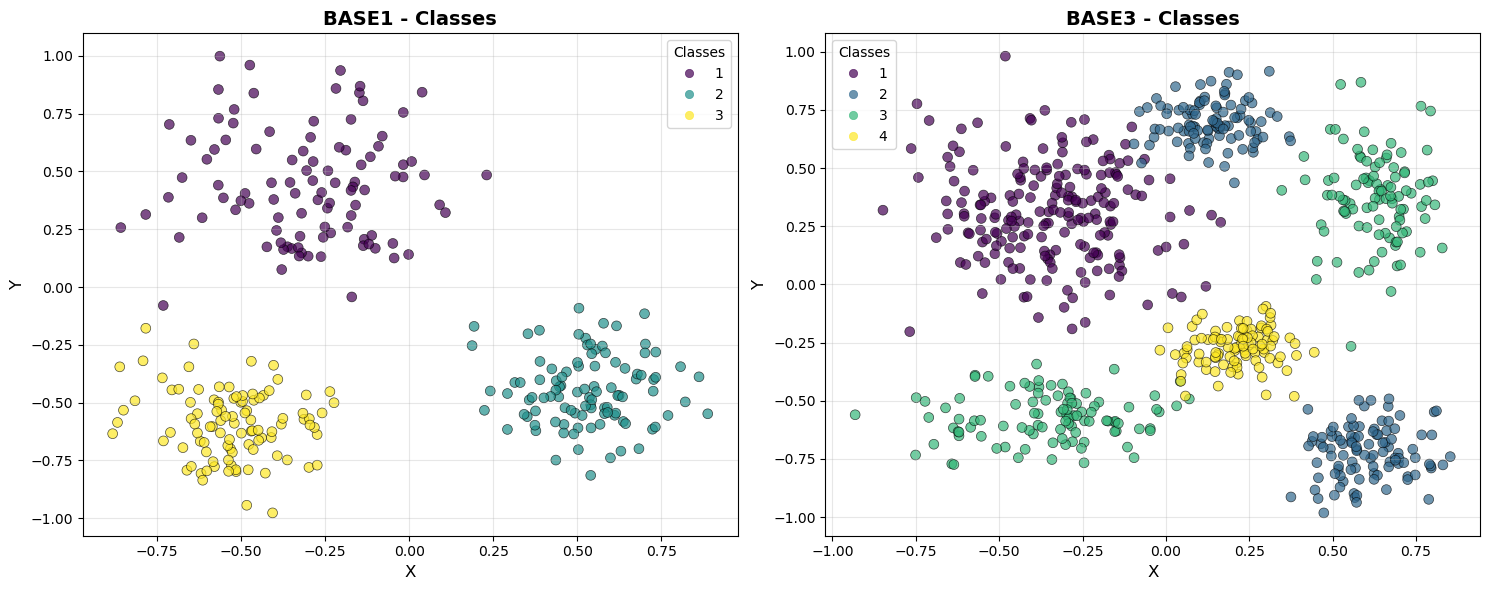

In [64]:
# VISUALISATION DES DONNÉES

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# BASE1
scatter1 = axes[0].scatter(X_base1[:, 0], X_base1[:, 1], 
                           c=y_base1, cmap='viridis', 
                           s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[0].set_title('BASE1 - Classes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend(*scatter1.legend_elements(), title="Classes", loc="best")

# BASE3
scatter2 = axes[1].scatter(X_base3[:, 0], X_base3[:, 1], 
                           c=y_base3, cmap='viridis', 
                           s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[1].set_title('BASE3 - Classes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend(*scatter2.legend_elements(), title="Classes", loc="best")

plt.tight_layout()
plt.savefig("Bases_visualisation.png")
plt.show()

 Pour K = 2 
  • Coût : 74.2931
  • Nombre d'itérations : 4

 Pour K = 3 
  • Coût : 18.4980
  • Nombre d'itérations : 4

 Pour K = 4 
  • Coût : 14.8779
  • Nombre d'itérations : 5

 Pour K = 5 
  • Coût : 12.6675
  • Nombre d'itérations : 7

 Pour K = 6 
  • Coût : 11.1599
  • Nombre d'itérations : 6



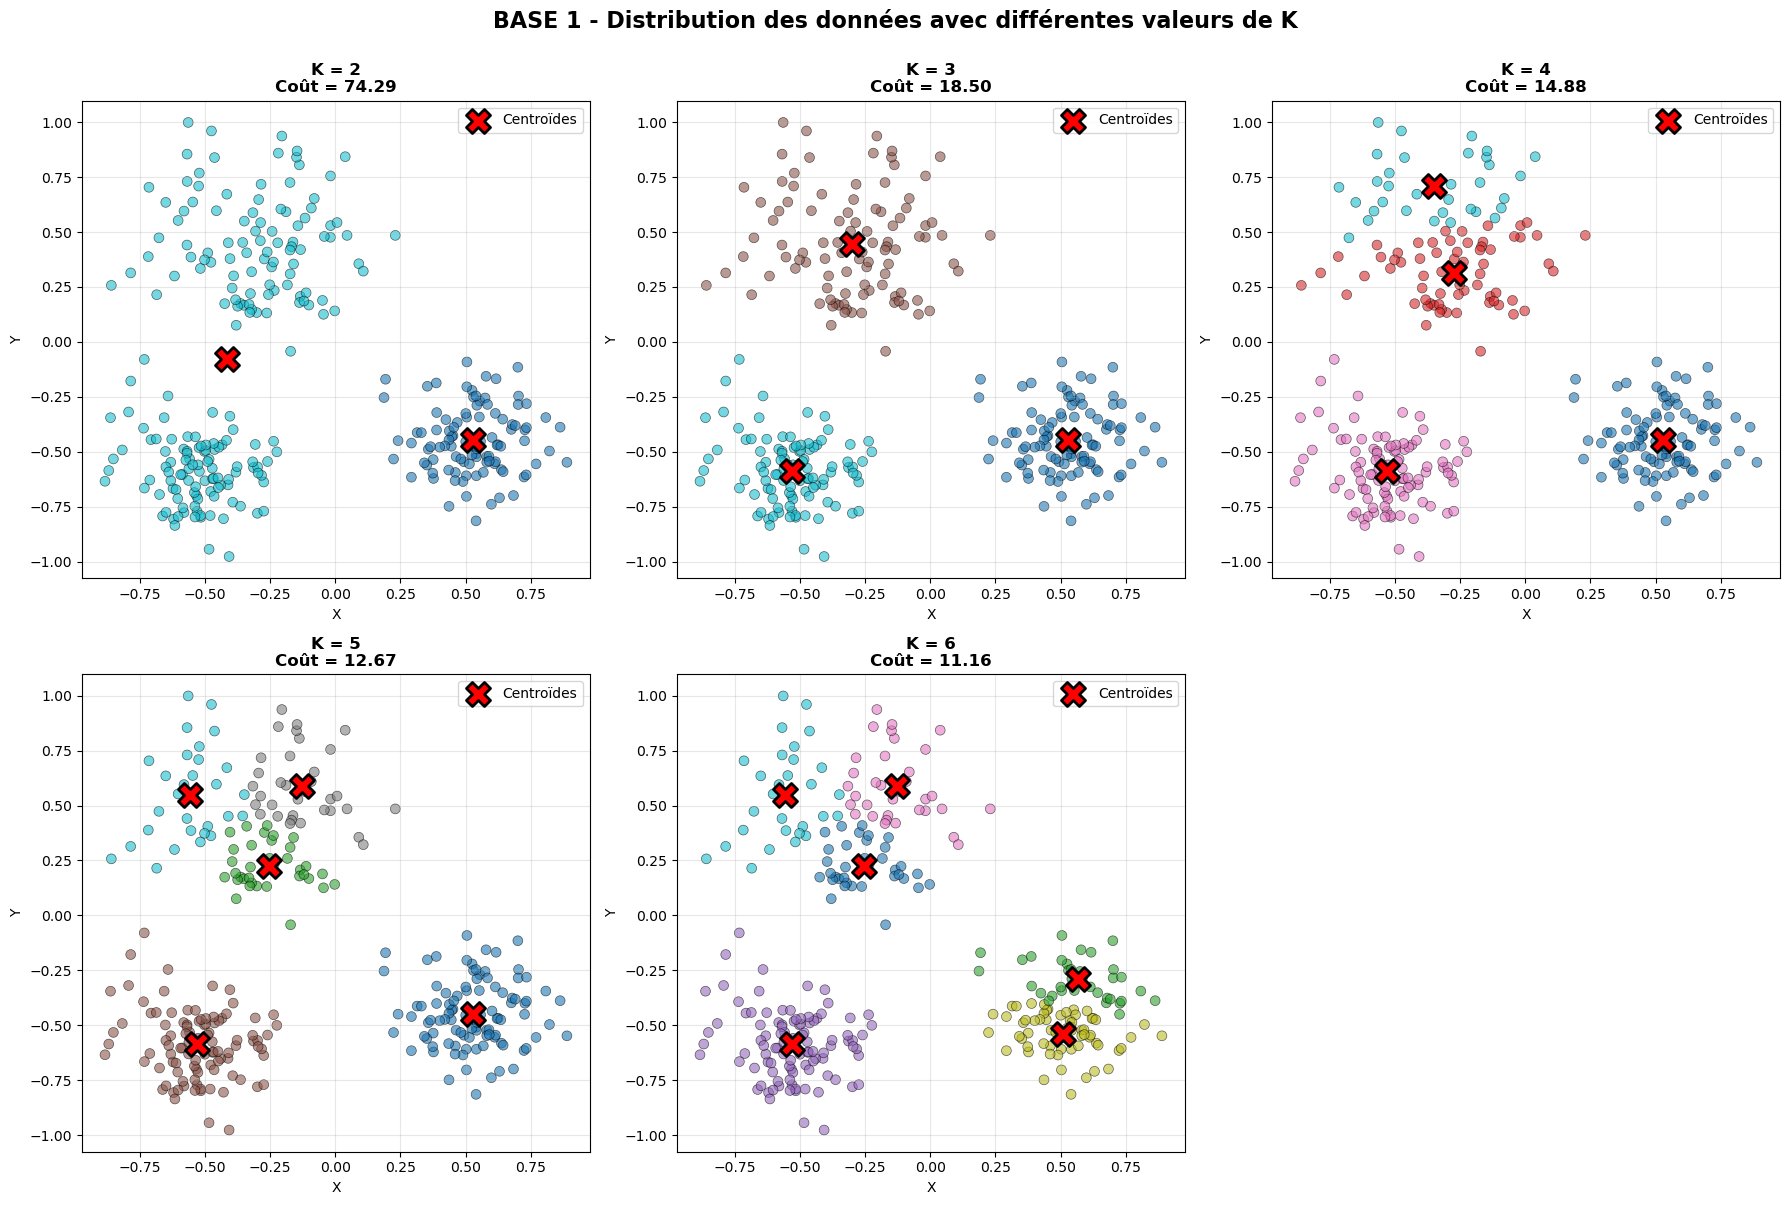

In [65]:
# TEST AVEC DIFFÉRENTES VALEURS DE K : BASE 1

# Valeurs de k à tester
k_values = [2, 3, 4, 5, 6]

# Stockage des résultats
results1 = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()  # Aplatir le tableau 2D en 1D

for idx, k in enumerate(k_values):
    print(f" Pour K = {k} ")
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_base1)
    
    centroids = kmeans.cluster_centers_
    
    inertia = kmeans.inertia_
    
    print(f"  • Coût : {inertia:.4f}")
    print(f"  • Nombre d'itérations : {kmeans.n_iter_}")
    
    results1.append({
        'k': k,
        'inertia': inertia,
        'n_iter': kmeans.n_iter_
    })
  
    ax = axes[idx]
    
    scatter = ax.scatter(X_base1[:, 0], X_base1[:, 1], 
                        c=labels, cmap='tab10', 
                        s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    ax.scatter(centroids[:, 0], centroids[:, 1],
              c='red', marker='X', s=300, 
              edgecolors='black', linewidths=2,
              label='Centroïdes', zorder=10)
    
    ax.set_title(f'K = {k}\nCoût = {inertia:.2f}', 
                fontsize=12, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    print()

fig.delaxes(axes[-1])

plt.suptitle('BASE 1 - Distribution des données avec différentes valeurs de K', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig("Bases_distribution.png")
plt.show()

In [14]:
# Tableau recapitulatif des résultats

df_results1 = pd.DataFrame(results1)
print(df_results1.to_string(index=False))

 k   inertia  n_iter
 2 74.293130       4
 3 18.497983       4
 4 14.877943       5
 5 12.667478       7
 6 11.159903       6


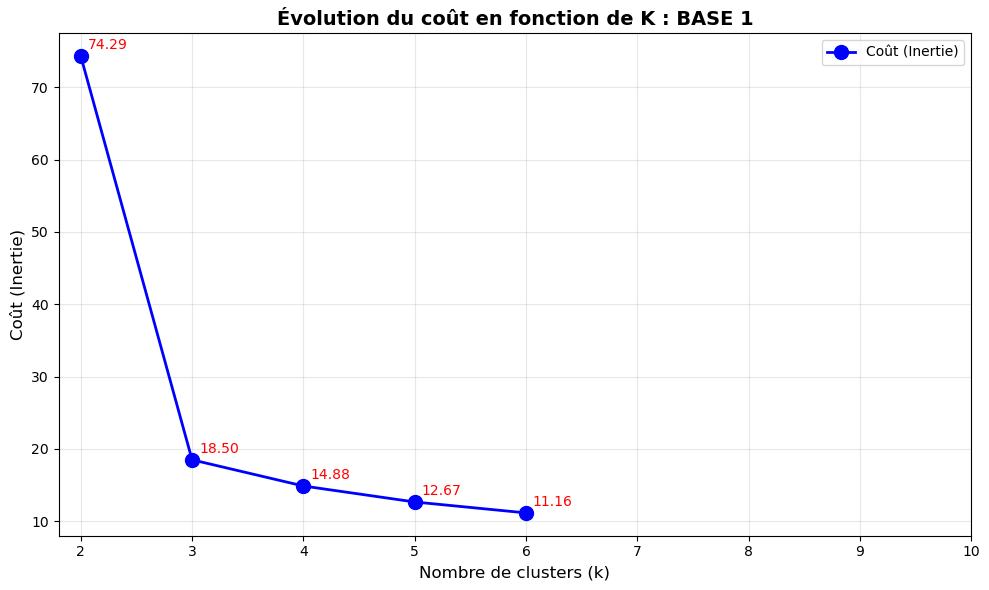

In [72]:
# Graphique d'évolution du coût

plt.figure(figsize=(10, 6))
plt.plot(df_results1['k'], df_results1['inertia'], 
        'bo-', linewidth=2, markersize=10, label='Coût (Inertie)')

# Annoter chaque point
for idx, row in df_results1.iterrows():
    plt.annotate(f'{row["inertia"]:.2f}', 
                xy=(row['k'], row['inertia']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, color='red')

plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Coût (Inertie)', fontsize=12)
plt.title('Évolution du coût en fonction de K : BASE 1', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.legend()
plt.tight_layout()
plt.savefig("Coude_base1.png")
plt.show()

 Pour K = 4 
  • Coût : 64.4641
  • Nombre d'itérations : 4

 Pour K = 6 
  • Coût : 28.4193
  • Nombre d'itérations : 4

 Pour K = 10 
  • Coût : 16.9940
  • Nombre d'itérations : 12

 Pour K = 13 
  • Coût : 13.7094
  • Nombre d'itérations : 14

 Pour K = 16 
  • Coût : 11.5371
  • Nombre d'itérations : 8



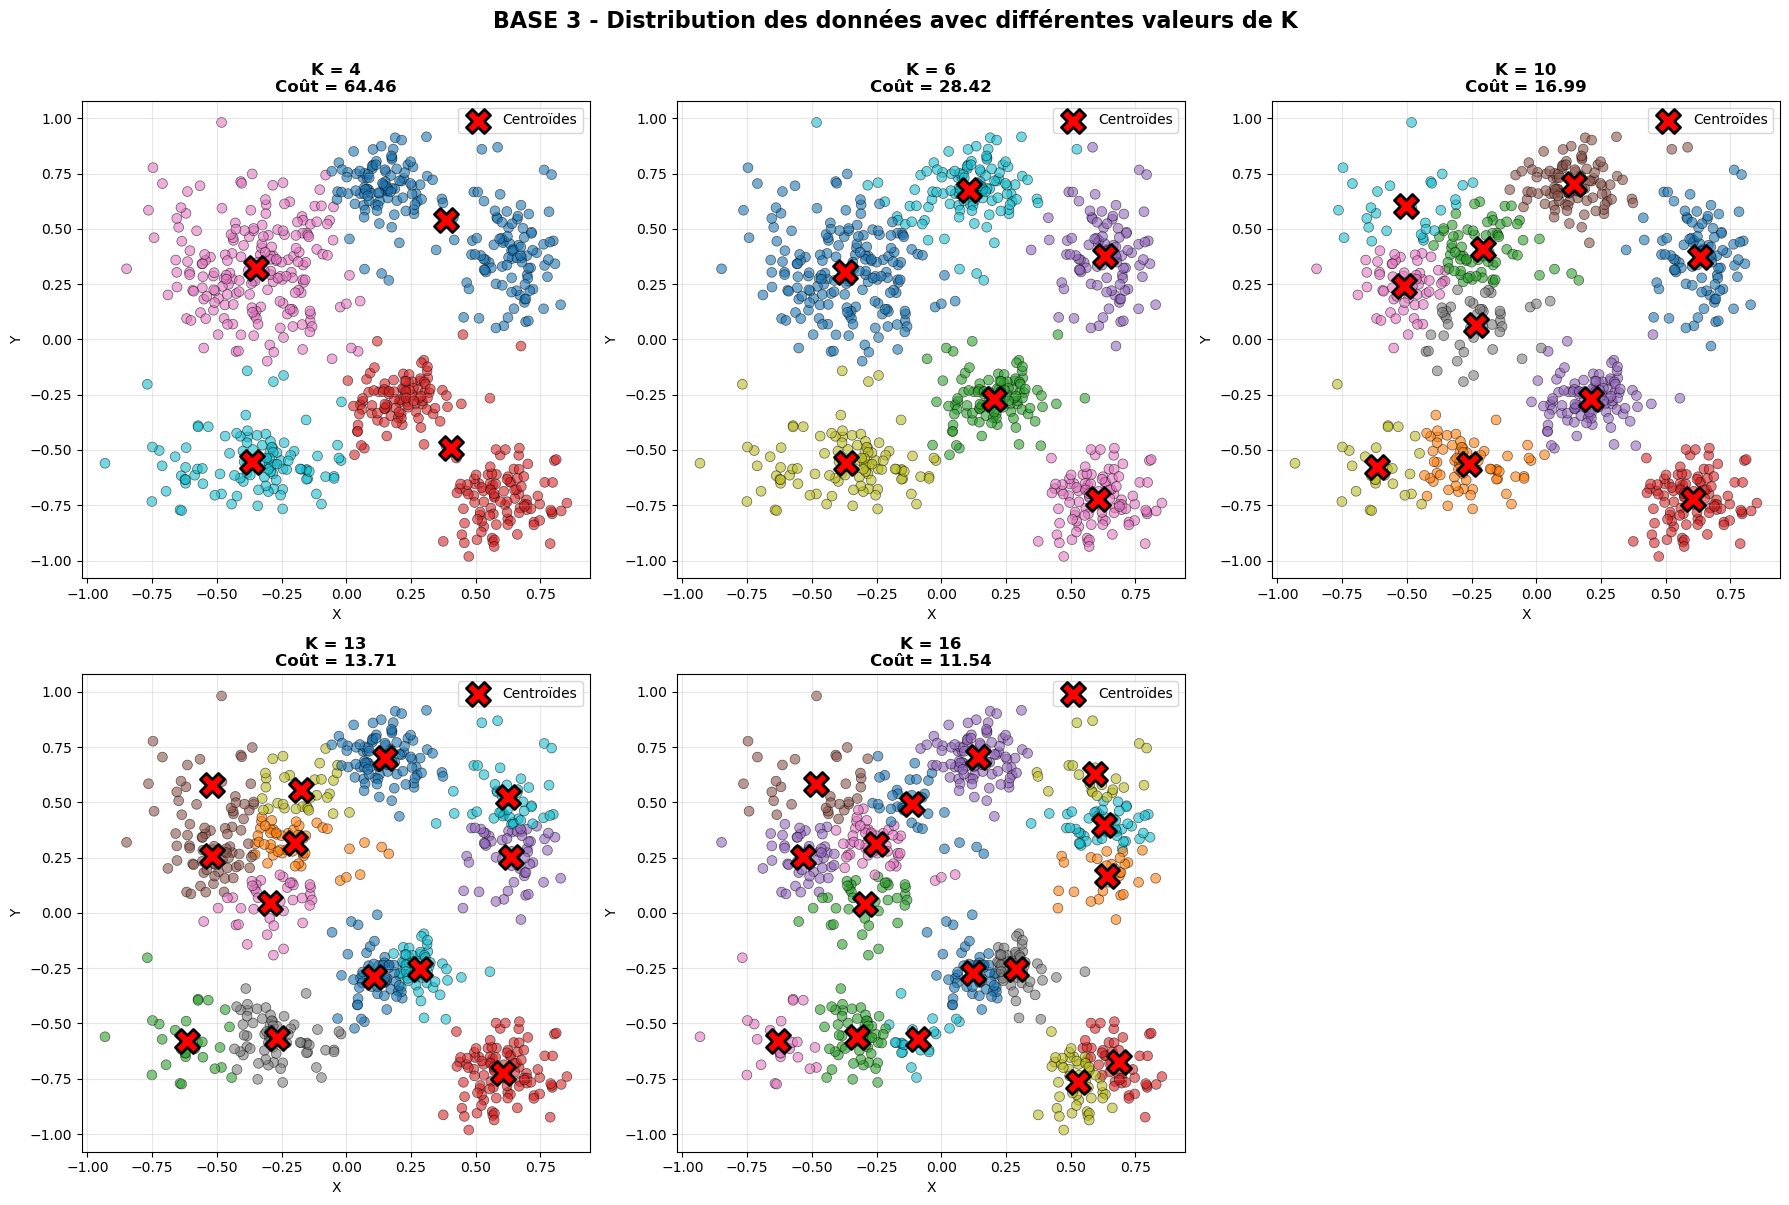

In [76]:
# TEST AVEC DIFFÉRENTES VALEURS DE K : BASE 3

# Valeurs de k à tester
k_values = [4, 6, 10, 13, 16]

# Stockage des résultats
results3 = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()  # Aplatir le tableau 2D en 1D

for idx, k in enumerate(k_values):
    print(f" Pour K = {k} ")
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_base3)
    
    centroids = kmeans.cluster_centers_
    
    inertia = kmeans.inertia_
    
    print(f"  • Coût : {inertia:.4f}")
    print(f"  • Nombre d'itérations : {kmeans.n_iter_}")
    
    results3.append({
        'k': k,
        'inertia': inertia,
        'n_iter': kmeans.n_iter_
    })
  
    ax = axes[idx]
    
    scatter = ax.scatter(X_base3[:, 0], X_base3[:, 1], 
                        c=labels, cmap='tab10', 
                        s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    ax.scatter(centroids[:, 0], centroids[:, 1],
              c='red', marker='X', s=300, 
              edgecolors='black', linewidths=2,
              label='Centroïdes', zorder=10)
    
    ax.set_title(f'K = {k}\nCoût = {inertia:.2f}', 
                fontsize=12, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    print()

fig.delaxes(axes[-1])

plt.suptitle('BASE 3 - Distribution des données avec différentes valeurs de K', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig("Bases_distribution3.png")
plt.show()

In [77]:
# Tableau recapitulatif des résultats

df_results3 = pd.DataFrame(results3)
print(df_results3.to_string(index=False))

 k   inertia  n_iter
 4 64.464139       4
 6 28.419299       4
10 16.994040      12
13 13.709410      14
16 11.537106       8


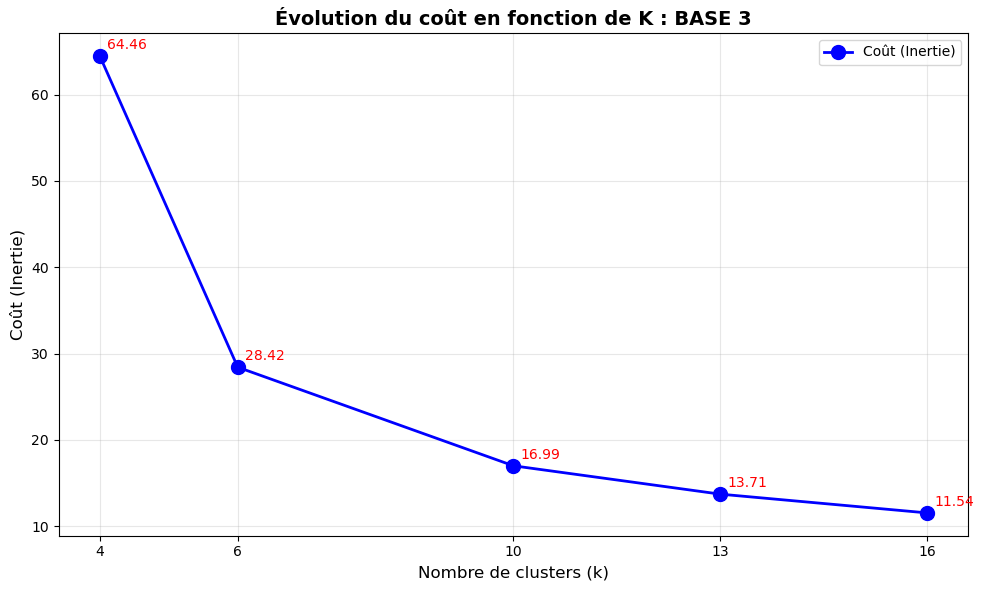

In [78]:
# Graphique d'évolution du coût

plt.figure(figsize=(10, 6))
plt.plot(df_results3['k'], df_results3['inertia'], 
        'bo-', linewidth=2, markersize=10, label='Coût (Inertie)')

# Annoter chaque point
for idx, row in df_results3.iterrows():
    plt.annotate(f'{row["inertia"]:.2f}', 
                xy=(row['k'], row['inertia']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, color='red')

plt.xlabel('Nombre de clusters (k)', fontsize=12)
plt.ylabel('Coût (Inertie)', fontsize=12)
plt.title('Évolution du coût en fonction de K : BASE 3', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.legend()
plt.tight_layout()
plt.savefig("Coude_base3.png")
plt.show()

===> Analyse pour K = 3 <===

Initialisation 1 : Coût = 18.50, Nombre d'itérations = 3


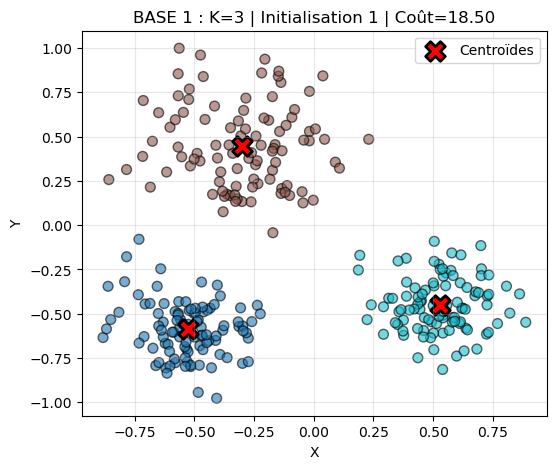

Initialisation 2 : Coût = 18.50, Nombre d'itérations = 2


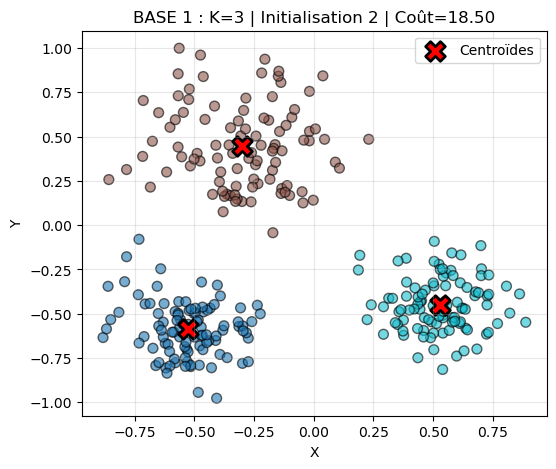

Initialisation 3 : Coût = 18.50, Nombre d'itérations = 3


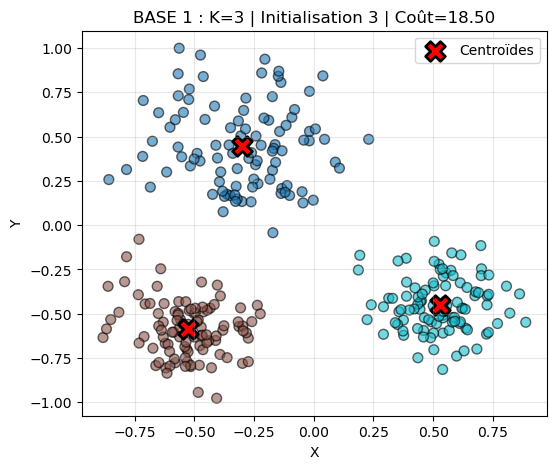

Initialisation 4 : Coût = 18.50, Nombre d'itérations = 3


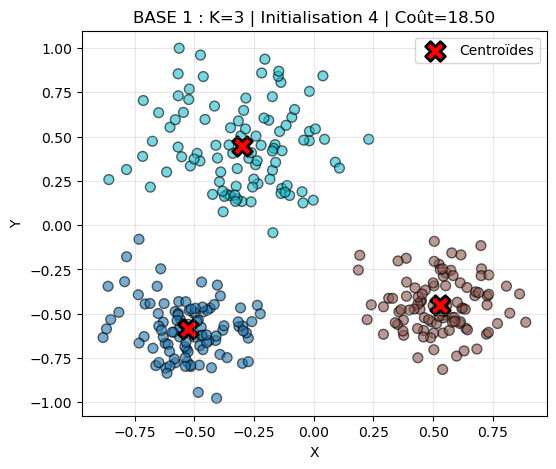

Initialisation 5 : Coût = 18.50, Nombre d'itérations = 3


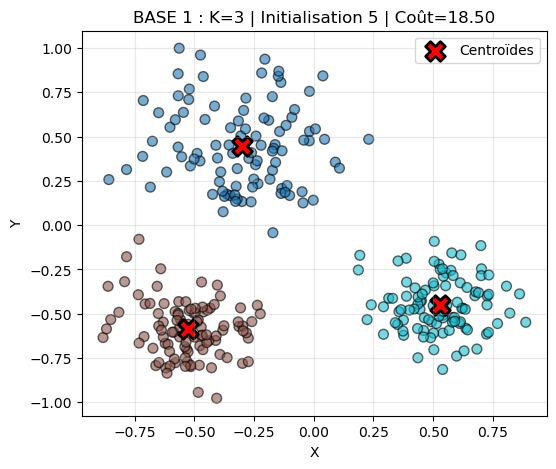


---> Résultats globaux <---
Coût moyen : 18.50
Variance du coût : 0.000000
Score Calinski-Harabasz : 1000.02
Stabilité des centroïdes : Stable ✅


In [35]:
# 5 Initialisations, BASE 1

# Valeurs
K_CHOSEN = 3
N_INITS = 5

# Stockage des résultats
inertias = []
centroids_list = []
labels_list = []

print(f"===> Analyse pour K = {K_CHOSEN} <===\n")

for i in range(N_INITS):
    kmeans = KMeans(n_clusters=K_CHOSEN, n_init=1)
    labels = kmeans.fit_predict(X_base1)
    inertias.append(kmeans.inertia_)
    labels_list.append(labels)
    centroids_list.append(kmeans.cluster_centers_)

    
    print(f"Initialisation {i+1} : Coût = {kmeans.inertia_:.2f}, Nombre d'itérations = {kmeans.n_iter_}")
    
    plt.figure(figsize=(6,5))
    plt.scatter(X_base1[:,0], X_base1[:,1], c=labels, cmap='tab10', s=50, alpha=0.6, edgecolors='black')
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                c='red', marker='X', s=200, edgecolors='black', linewidths=2, label='Centroïdes')
    plt.title(f'BASE 1 : K={K_CHOSEN} | Initialisation {i+1} | Coût={kmeans.inertia_:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


inertia_mean = np.mean(inertias)
inertia_var = np.var(inertias)

# Score Calinski-Harabasz
kmeans_full = KMeans(n_clusters=K_CHOSEN, n_init=10)
labels_full = kmeans_full.fit_predict(X_base1)
ch_score = calinski_harabasz_score(X_base1, labels_full)


# Fonction de vérification de la stabilité :
def check_centroid_stability(centroids_list, tolerance=1e-4):
    
    if len(centroids_list) < 2:
        return True

    ref_centroids = centroids_list[0]
    
    for i in range(1, len(centroids_list)):
        current_centroids = centroids_list[i]
        distances = cdist(ref_centroids, current_centroids)
        min_distances = np.min(distances, axis=1)
        max_shift = np.max(min_distances)
        
        if max_shift > tolerance:
            return False

    return True


# Vérification de la stabilité
stable = check_centroid_stability(centroids_list)

print("\n---> Résultats globaux <---")
print(f"Coût moyen : {inertia_mean:.2f}")
print(f"Variance du coût : {inertia_var:.6f}") # Variance doit être très petite, donc plus de décimales
print(f"Score Calinski-Harabasz : {ch_score:.2f}")
print("Stabilité des centroïdes :", "Stable ✅" if stable else "Instable ❌")


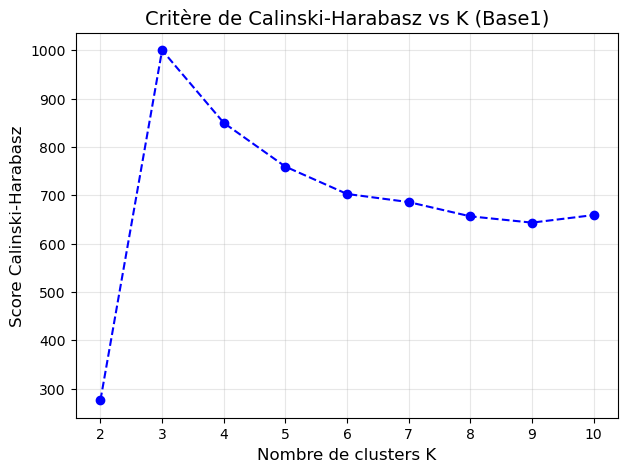

In [74]:
# Valeurs de K à tester
k_values = range(2, 11)  # de 2 à 10 clusters par exemple
ch_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10) 
    labels = kmeans.fit_predict(X_base1)
    ch = calinski_harabasz_score(X_base1, labels)
    ch_scores.append(ch)

# Tracé du graphique
plt.figure(figsize=(7,5))
plt.plot(k_values, ch_scores, marker='o', linestyle='--', color='b')
plt.title('Critère de Calinski-Harabasz vs K (Base1)', fontsize=14)
plt.xlabel('Nombre de clusters K', fontsize=12)
plt.ylabel('Score Calinski-Harabasz', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.savefig("Critère_CH_base1.png")
plt.show()

===> Analyse pour K = 6 <===

Initialisation 1 : Coût = 28.42, Nombre d'itérations = 7


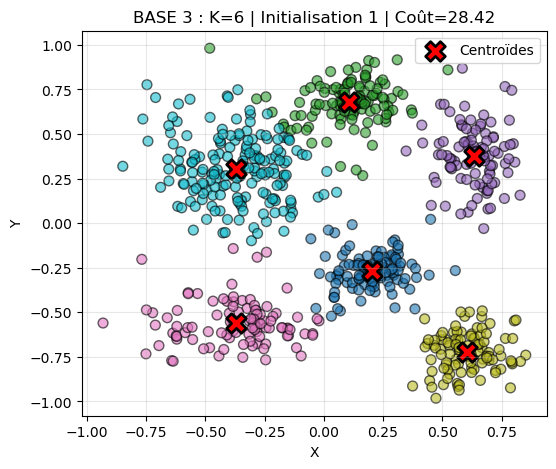

Initialisation 2 : Coût = 28.42, Nombre d'itérations = 21


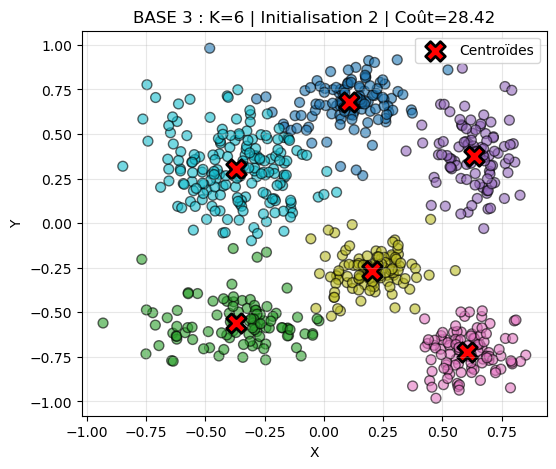

Initialisation 3 : Coût = 28.44, Nombre d'itérations = 4


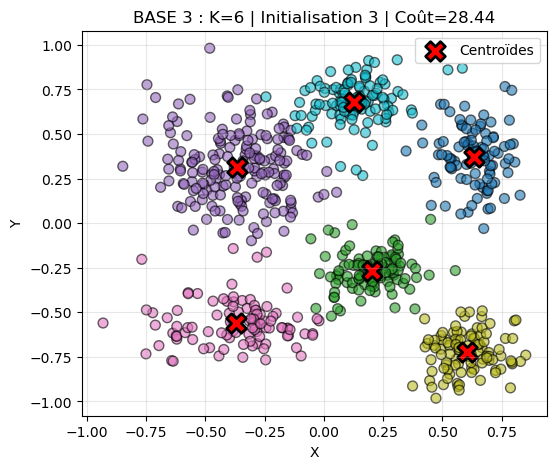

Initialisation 4 : Coût = 28.42, Nombre d'itérations = 6


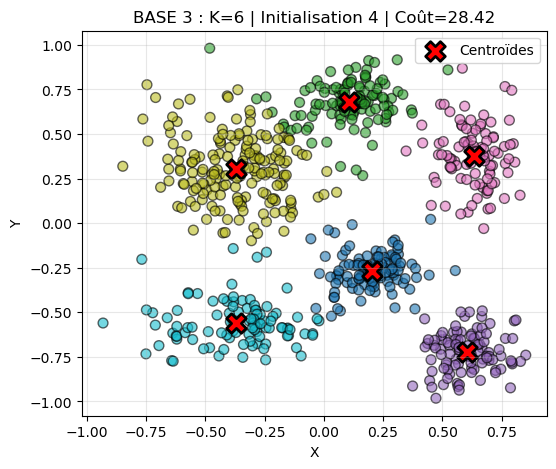

Initialisation 5 : Coût = 28.42, Nombre d'itérations = 6


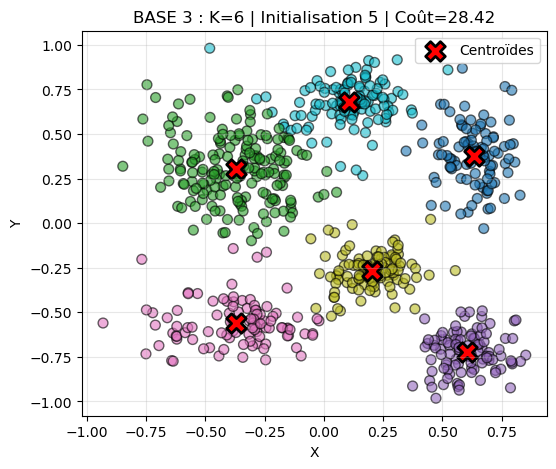


---> Résultats globaux <---
Coût moyen : 28.42
Variance du coût : 0.000065
Score Calinski-Harabasz : 1415.40
Stabilité des centroïdes : Instable ❌


In [83]:
# 5 Initialisations, BASE 3

# Valeurs
K_CHOSEN = 6
N_INITS = 5

# Stockage des résultats
inertias = []
centroids_list = []
labels_list = []

print(f"===> Analyse pour K = {K_CHOSEN} <===\n")

for i in range(N_INITS):
    kmeans = KMeans(n_clusters=K_CHOSEN, n_init=1)
    labels = kmeans.fit_predict(X_base3)
    inertias.append(kmeans.inertia_)
    labels_list.append(labels)
    centroids_list.append(kmeans.cluster_centers_)

    
    print(f"Initialisation {i+1} : Coût = {kmeans.inertia_:.2f}, Nombre d'itérations = {kmeans.n_iter_}")
    
    plt.figure(figsize=(6,5))
    plt.scatter(X_base3[:,0], X_base3[:,1], c=labels, cmap='tab10', s=50, alpha=0.6, edgecolors='black')
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                c='red', marker='X', s=200, edgecolors='black', linewidths=2, label='Centroïdes')
    plt.title(f'BASE 3 : K={K_CHOSEN} | Initialisation {i+1} | Coût={kmeans.inertia_:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


inertia_mean = np.mean(inertias)
inertia_var = np.var(inertias)

# Score Calinski-Harabasz
kmeans_full = KMeans(n_clusters=K_CHOSEN, n_init=10)
labels_full = kmeans_full.fit_predict(X_base3)
ch_score = calinski_harabasz_score(X_base3, labels_full)


# Fonction de vérification de la stabilité :
def check_centroid_stability(centroids_list, tolerance=1e-4):
    
    if len(centroids_list) < 2:
        return True

    ref_centroids = centroids_list[0]
    
    for i in range(1, len(centroids_list)):
        current_centroids = centroids_list[i]
        distances = cdist(ref_centroids, current_centroids)
        min_distances = np.min(distances, axis=1)
        max_shift = np.max(min_distances)
        
        if max_shift > tolerance:
            return False

    return True


# Vérification de la stabilité
stable = check_centroid_stability(centroids_list)

print("\n---> Résultats globaux <---")
print(f"Coût moyen : {inertia_mean:.2f}")
print(f"Variance du coût : {inertia_var:.6f}") # Variance doit être très petite, donc plus de décimales
print(f"Score Calinski-Harabasz : {ch_score:.2f}")
print("Stabilité des centroïdes :", "Stable ✅" if stable else "Instable ❌")


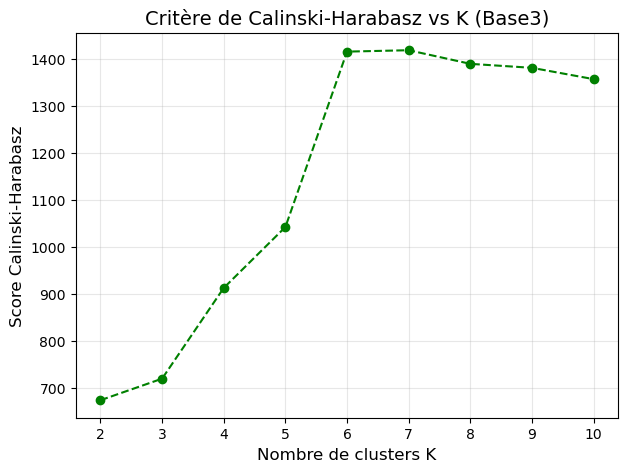

In [75]:
# Valeurs de K à tester
k_values = range(2, 11)  # de 2 à 10 clusters par exemple
ch_scores_base3 = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)  # n_init=10 pour stabilité
    labels = kmeans.fit_predict(X_base3)
    ch = calinski_harabasz_score(X_base3, labels)
    ch_scores_base3.append(ch)

# Tracé du graphique
plt.figure(figsize=(7,5))
plt.plot(k_values, ch_scores_base3, marker='o', linestyle='--', color='g')
plt.title('Critère de Calinski-Harabasz vs K (Base3)', fontsize=14)
plt.xlabel('Nombre de clusters K', fontsize=12)
plt.ylabel('Score Calinski-Harabasz', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.savefig("Critère_CH_base3.png")
plt.show()

In [57]:
# 1. Chargement et préparation des données
digits = load_digits()
X = digits.data
y = digits.target

# Séparation en bases d'apprentissage (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Clustering K-means avec K=10 sur la base d'apprentissage
K = 10
n_initializations = 5
purity_results = []

print(f"--- Clustering K-means (K={K}) sur la base Digits (Apprentissage) ---")

for init_run in range(n_initializations):
    kmeans = KMeans(n_clusters=K, init='random', n_init=1, random_state=init_run)
    kmeans.fit(X_train)
    
    cluster_labels = kmeans.labels_
    
    # Calcul de la pureté moyenne (p)
    cluster_purities = []
    
    for i in range(K):
        indices_cluster_i = np.where(cluster_labels == i)[0]
        true_labels_cluster_i = y_train[indices_cluster_i]
        label_counts = Counter(true_labels_cluster_i)
        
        if len(label_counts) > 0:
            majoritary_class_count = label_counts.most_common(1)[0][1]
            total_examples_in_cluster = len(indices_cluster_i)
            
            p_i = majoritary_class_count / total_examples_in_cluster
            cluster_purities.append(p_i)
        else:
            cluster_purities.append(0.0)

    # Pureté moyenne pour cette initialisation
    mean_purity = np.mean(cluster_purities)
    purity_results.append(mean_purity)
    
    print(f"Initialisation {init_run + 1}: Pureté Moyenne = {mean_purity:.4f}")

mean_purity_overall = np.mean(purity_results)
variance_purity_overall = np.var(purity_results)

print("\n--- Résultats Finaux (sur 5 initialisations) ---")
print(f"Pureté Moyenne Estimée (E[p]): {mean_purity_overall:.4f}")
print(f"Variance Estimée de la Pureté (Var[p]): {variance_purity_overall:.6f}")

if variance_purity_overall < 0.001:
    stability_conclusion = "L'algorithme est très stable, car la variance de la pureté est très faible."
else:
    stability_conclusion = "L'algorithme montre une certaine sensibilité à l'initialisation, car la variance de la pureté est notable."

print(f"\nConclusion : Avec une pureté moyenne de {mean_purity_overall:.4f}, le K-means parvient à regrouper les chiffres de manière relativement cohérente avec les vraies classes. {stability_conclusion}")


--- Clustering K-means (K=10) sur la base Digits (Apprentissage) ---
Initialisation 1: Pureté Moyenne = 0.7918
Initialisation 2: Pureté Moyenne = 0.7784
Initialisation 3: Pureté Moyenne = 0.7658
Initialisation 4: Pureté Moyenne = 0.7881
Initialisation 5: Pureté Moyenne = 0.7561

--- Résultats Finaux (sur 5 initialisations) ---
Pureté Moyenne Estimée (E[p]): 0.7760
Variance Estimée de la Pureté (Var[p]): 0.000180

Conclusion : Avec une pureté moyenne de 0.7760, le K-means parvient à regrouper les chiffres de manière relativement cohérente avec les vraies classes. L'algorithme est très stable, car la variance de la pureté est très faible.


--- Classification par K-means + Plus-Proche-Voisin ---
k'=1, Initialisation 1: Taux de Reconnaissance = 0.8889
k'=1, Initialisation 2: Taux de Reconnaissance = 0.8889
k'=1, Initialisation 3: Taux de Reconnaissance = 0.8889
k'=1, Initialisation 4: Taux de Reconnaissance = 0.8889
k'=1, Initialisation 5: Taux de Reconnaissance = 0.8889
--- k'=1 Terminé. Moyenne: 0.8889, Variance: 0.000000 ---

k'=2, Initialisation 1: Taux de Reconnaissance = 0.9333
k'=2, Initialisation 2: Taux de Reconnaissance = 0.9315
k'=2, Initialisation 3: Taux de Reconnaissance = 0.9315
k'=2, Initialisation 4: Taux de Reconnaissance = 0.9222
k'=2, Initialisation 5: Taux de Reconnaissance = 0.9167
--- k'=2 Terminé. Moyenne: 0.9270, Variance: 0.000042 ---

k'=3, Initialisation 1: Taux de Reconnaissance = 0.9556
k'=3, Initialisation 2: Taux de Reconnaissance = 0.9593
k'=3, Initialisation 3: Taux de Reconnaissance = 0.9574
k'=3, Initialisation 4: Taux de Reconnaissance = 0.9556
k'=3, Initialisation 5: Taux de Reconnaiss

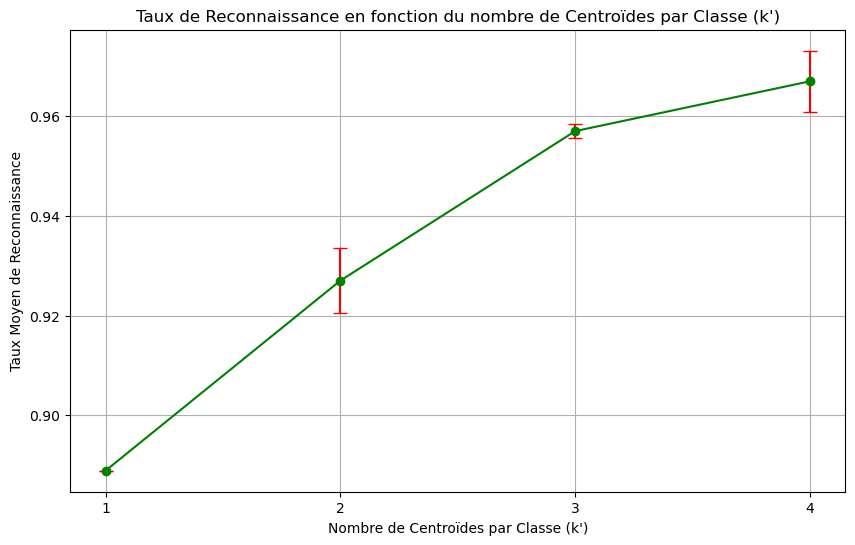

In [84]:
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_prime_values = [1, 2, 3, 4] 
n_initializations = 5 
results = {}

print("--- Classification par K-means + Plus-Proche-Voisin ---")

for k_prime in k_prime_values:
    total_k = 10 * k_prime
    accuracy_list = []
    
    for init_run in range(n_initializations):
        all_centroids = []
        all_centroid_labels = []
        
        for digit in range(10):
            X_digit = X_train[y_train == digit]
            kmeans = KMeans(n_clusters=k_prime, init='k-means++', n_init='auto', random_state=init_run)
            kmeans.fit(X_digit)
            
            all_centroids.append(kmeans.cluster_centers_)
            all_centroid_labels.extend([digit] * k_prime)
            
        centroids_train = np.concatenate(all_centroids)
        labels_train = np.array(all_centroid_labels)
        
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(centroids_train, labels_train)
        
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)
        
        print(f"k'={k_prime}, Initialisation {init_run + 1}: Taux de Reconnaissance = {accuracy:.4f}")

    mean_accuracy = np.mean(accuracy_list)
    variance_accuracy = np.var(accuracy_list)
    results[k_prime] = {'mean': mean_accuracy, 'variance': variance_accuracy}
    
    print(f"--- k'={k_prime} Terminé. Moyenne: {mean_accuracy:.4f}, Variance: {variance_accuracy:.6f} ---\n")

print("\n--- Tableau Récapitulatif des Taux de Reconnaissance ---")
print("k' | Taux Moyen de Reconnaissance | Variance")
print("---|------------------------------|----------")
for k_prime, res in results.items():
    print(f"{k_prime} | {res['mean']:.4f} | {res['variance']:.6f}")

k_primes = list(results.keys())
mean_accs = [res['mean'] for res in results.values()]
variances = [res['variance'] for res in results.values()]
std_devs = np.sqrt(variances)

plt.figure(figsize=(10, 6))
plt.errorbar(k_primes, mean_accs, yerr=std_devs, fmt='-o', capsize=5, color='green', ecolor='red')
plt.title('Taux de Reconnaissance en fonction du nombre de Centroïdes par Classe (k\')')
plt.xlabel("Nombre de Centroïdes par Classe (k')")
plt.ylabel("Taux Moyen de Reconnaissance")
plt.xticks(k_primes)
plt.grid(True)
plt.savefig("Reconnaissance.png")
plt.show()

Convergence atteinte après 4 itérations.

--- Comparaison des résultats pour K=3 (avec random_state=42) ---
Mon K-means - Inertia: 18.4980
Sklearn K-means - Inertia: 18.4980

Mes Centroïdes (arrondis à 4 décimales):
[[-0.5288 -0.587 ]
 [-0.2994  0.4442]
 [ 0.5298 -0.4488]]

Centroïdes Sklearn (arrondis à 4 décimales):
[[ 0.5298 -0.4488]
 [-0.5288 -0.587 ]
 [-0.2994  0.4442]]


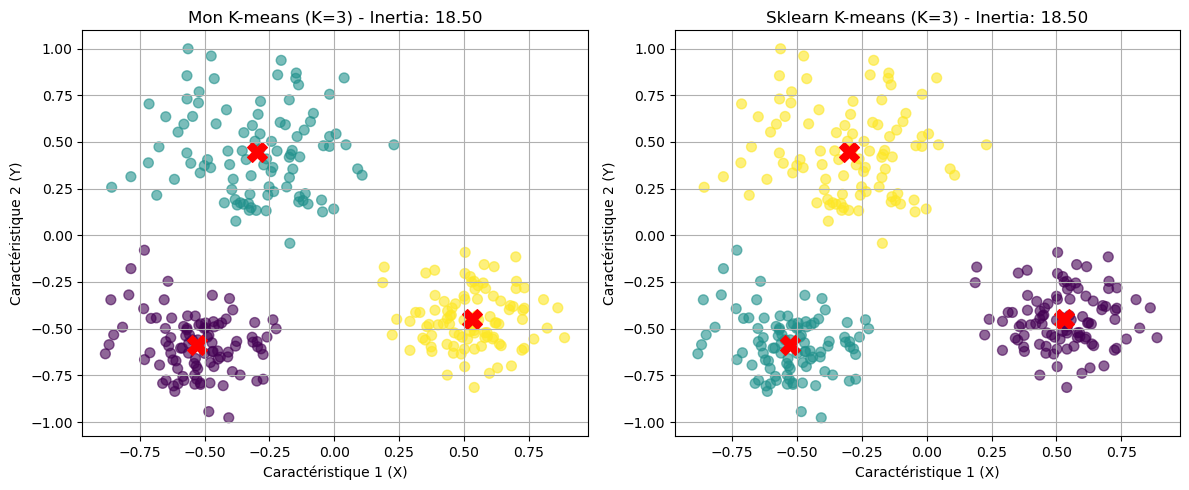

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SklearnKMeans # On renomme pour éviter les conflits

data = pd.read_csv('base1.txt', sep=' ', header=None)
X = data.iloc[:, :2].values

def custom_kmeans(X, K, max_iter=300, tol=1e-4, random_state=None):
    """
    Implémentation simple de l'algorithme K-means.
    """
    if random_state is not None:
        np.random.seed(random_state)
        
    n_samples, n_features = X.shape
    
    random_indices = np.random.choice(n_samples, K, replace=False)
    centroids = X[random_indices]
    
    for i in range(max_iter):
        distances = np.sum((X[:, np.newaxis] - centroids)**2, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.zeros((K, n_features))
        for k in range(K):
            points_in_cluster = X[labels == k]
            if len(points_in_cluster) > 0:
                new_centroids[k] = points_in_cluster.mean(axis=0)
            else:
                new_centroids[k] = centroids[k]
        
        centroid_shift = np.sum(np.sqrt(np.sum((new_centroids - centroids)**2, axis=1)))
        
        centroids = new_centroids
        
        if centroid_shift < tol:
            print(f"Convergence atteinte après {i+1} itérations.")
            break
            
    final_distances = np.sum((X[:, np.newaxis] - centroids)**2, axis=2)
    min_distances = np.min(final_distances, axis=1)
    inertia = np.sum(min_distances)
    
    return labels, centroids, inertia

K_test = 3
random_seed = 42

my_labels, my_centroids, my_inertia = custom_kmeans(X, K_test, random_state=random_seed)

sklearn_kmeans = SklearnKMeans(n_clusters=K_test, init='random', n_init=1, random_state=random_seed)
sklearn_kmeans.fit(X)
sklearn_labels = sklearn_kmeans.labels_
sklearn_centroids = sklearn_kmeans.cluster_centers_
sklearn_inertia = sklearn_kmeans.inertia_

print("\n--- Comparaison des résultats pour K=3 (avec random_state=42) ---")
print(f"Mon K-means - Inertia: {my_inertia:.4f}")
print(f"Sklearn K-means - Inertia: {sklearn_inertia:.4f}")

print("\nMes Centroïdes (arrondis à 4 décimales):")
print(np.round(my_centroids, 4))
print("\nCentroïdes Sklearn (arrondis à 4 décimales):")
print(np.round(sklearn_centroids, 4))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=my_labels, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], 
            c='red', marker='X', s=200, label='Centroïdes')
plt.title(f'Mon K-means (K={K_test}) - Inertia: {my_inertia:.2f}')
plt.xlabel('Caractéristique 1 (X)')
plt.ylabel('Caractéristique 2 (Y)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], 
            c='red', marker='X', s=200, label='Centroïdes')
plt.title(f'Sklearn K-means (K={K_test}) - Inertia: {sklearn_inertia:.2f}')
plt.xlabel('Caractéristique 1 (X)')
plt.ylabel('Caractéristique 2 (Y)')
plt.grid(True)

plt.tight_layout()
plt.savefig("LastFig.png")
plt.show()